# Analise de Dados Olist

Olist é uma statup Brasileira que atua no segmento de e-commerce, sobretudo por meio de marketplace, conecta pequenas empresas de todo o Brasil, esses comerciantes podem vender seus produtos através da **Lojas Olist**, e enviá-los diretamente para os clientes usando os parceiros de logística **Olist**.

Esse conjunto de dados usado nesse projeto, está disponível [Kaggle](https://www.kaggle.com/olistbr/brazilian-ecommerce), dados público de comércio eletrônico Brasileiro de pedidos feito pela **Lojas Olist**, o conjunto contem informações de 100 mil pedidos de 2016 a 2018 feito em diversos mercado do Brasil. Seus recursos permitem a visualização pedido em varias dimensões, desde o status do pedido, preço, pagamento, frete, localização do cliente e avaliação do cliente. 

São dados comerciais reais, que foram anonimizados, e as referências das empresas e parceiras, foram substituídas pelos nomes das grandes casas de Game of Thrones.

Pontos que estão sendo analisados:
* Aquisição dos Dados
* Analise Exploratória dos Dados
    * Dataset olist_customers_dataset
    * Dataset olist_geolocation_dataset
    * Dataset olist_order_items_dataset
    * Dataset olist_order_payments_dataset
    * Dataset olist_order_reviews_dataset
    * Dataset olist_orders_dataset
    * Dataset olist_products_dataset
    * Dataset olist_sellers_dataset
    * Dataset product_category_name_translation
    * Tipo de Dados
    * Valores ausentes
    * Analise estatísticas dos Datasets
    * Matriz de Correlação
    * Gráfico que mostra a distribuição das variáveis numéricas
    * Identificar Outliers
* Criar novo Dataset
    * Converter as variaǘeis Data
* Criando analises para gerar insights

## Esquema de Dados

Os Dados originalmente estão distribuídos em vários conjuntos de dados, uma imagem para ilustrar:

<p align="center">
  <img width="70%" src="https://i.imgur.com/HRhd2Y0.png" alt="Churn_Prediction"height=400px >
</p>

## Aquisição dos Dados

Os dados disponibilizados publicamente no site do [Kaggle](https://www.kaggle.com/olistbr/brazilian-ecommerce) pelo ***Lojas Olist***, originalmente são divididos em 9 datasets.

In [1]:
# importando pacotes
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# warnings filter
import warnings
warnings.filterwarnings('ignore')

# carregandos arquivos de dados
# Dataset de clientes olist_customers_dataset.csv
DATA_FILE_CUSTUMERS = 'data/olist_customers_dataset.csv'
# Dataset de geolocalizacao olist_geolocation_dataset.csv
DATA_FILE_GEOLOCATION = 'data/olist_geolocation_dataset.csv'
# Dataset de itens olist_order_items_dataset.csv
DATA_FILE_ORDER_ITENS = 'data/olist_order_items_dataset.csv'
# Dataset de pagamentos olist_order_payments_dataset.csv
DATA_FILE_ORDER_PAYMENTS = 'data/olist_order_payments_dataset.csv'
# Dataset de avaliacoes olist_order_reviews_dataset.csv
DATA_FILE_ORDER_REVIEWS = 'data/olist_order_reviews_dataset.csv'
# Dataset de ordens olist_orders_dataset.csv
DATA_FILE_ORDERS = 'data/olist_orders_dataset.csv'
# Dataset de produtos olist_products_dataset.csv
DATA_FILE_PRODUCTS = 'data/olist_products_dataset.csv'
# Dataset de vendedores olist_sellers_dataset.csv
DATA_FILE_SELLERS = 'data/olist_sellers_dataset.csv'
# Dataset de categoria de produto product_category_name_translation.csv
DATA_FILE_PRODUCT_CATEGORY = 'data/product_category_name_translation.csv'

# importando dados
df_custumers = pd.read_csv(DATA_FILE_CUSTUMERS)
df_geolocation = pd.read_csv(DATA_FILE_GEOLOCATION)
df_order_itens = pd.read_csv(DATA_FILE_ORDER_ITENS)
df_order_payments = pd.read_csv(DATA_FILE_ORDER_PAYMENTS)
df_order_reviews = pd.read_csv(DATA_FILE_ORDER_REVIEWS)
df_orders = pd.read_csv(DATA_FILE_ORDERS)
df_products = pd.read_csv(DATA_FILE_PRODUCTS)
df_sellers = pd.read_csv(DATA_FILE_SELLERS)
df_product_category = pd.read_csv(DATA_FILE_PRODUCT_CATEGORY)

## Analise Exploratória dos Dados

Para melhor entendimento dos dados de cada Dataset, foi criado um dicionários de variáveis:

------------------

### Dataset ***olist_customers_dataset***:

* `customer_id` - Identificação do cliente, chave para o conjunto de dados de pedidos, cada pedido possui um `customer_id`.
* `customer_unique_id` - Identificador único de um cliente.
* `customer_zip_code_prefix` - Primeiros cinco digitos do código postal do cliente.
* `customer_city` - Nome da cidade do cliente.
* `customer_state` - Estado do cliente.

Este conjunto de dados contém informações sobre o cliente e sua localização. Use-o para identificar clientes únicos no conjunto de dados de pedidos e para encontrar o local de entrega dos pedidos.

Em nosso sistema, cada pedido é atribuído a um ID de cliente único . Isso significa que o mesmo cliente obterá IDs diferentes para pedidos diferentes. O objetivo de ter um unique_id do cliente no conjunto de dados é permitir que você identifique os clientes que fizeram recompras na loja. Caso contrário, você descobrirá que cada pedido tem um cliente diferente associado.

Dataset de clientes possui 99441 linhas e 5 colunas.

In [2]:
# Dimensoes do dataset
print('Dimensoes do Dataset: \n',
     'Número de variáveis: ',df_custumers.shape[1], '\n',
     'Número de linhas: ',df_custumers.shape[0])
print('----------------------------------------------------------')

# lendo as primeiras linhas
df_custumers.head(2)

Dimensoes do Dataset: 
 Número de variáveis:  5 
 Número de linhas:  99441
----------------------------------------------------------


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP


### Dataset ***olist_geolocation_dataset***:

* `geolocation_zip_code_prefix` - Primeiros 5 digitos do código postal.
* `geolocation_lat` - Latitude.
* `geolocation_lng` - Longitude.
* `geolocation_city` - Nome da cidade.
* `geolocation_state` - Estado.

Este conjunto de dados contém informações dos CEPs brasileiros e suas coordenadas lat / lng. Use-o para traçar mapas e encontrar distâncias entre vendedores e clientes.

Dataset de geolocalização possui 1000163 linhas e 5 colunas.

In [11]:
# dimensoes do dataset
print('Dimensoes do Dataset: \n',
     'Número de variáveis: ',df_geolocation.shape[1], '\n',
     'Búmero de linhas: ',df_geolocation.shape[0])
print('------------------------------------------------------------')

# lendo as primeiras linhas
df_geolocation.head(2)

Dimensoes do Dataset: 
 Número de variáveis:  5 
 Búmero de linhas:  1000163
------------------------------------------------------------


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP


### Dataset ***olist_order_items_dataset***:

* `order_id` - Identificador único do pedido.
* `order_item_id` - Número sequencial que identifica o número de itens incluídos na mesma ordem.
* `product_id` - Identificar único do produto.
* `seller_id` - Identificador único do vendedor.
* `shipping_limit_date` - Mostra a data limite de envio do vendedor, para lidar com o pedido ao parceiro logística.
* `price` - Preço do item.
* `freight_value` - Item com valor de frete (se o pedido ter mais de um item, o valor do frete é dividido entre os itens).

Este conjunto de dados inclui dados sobre os itens adquiridos em cada pedido.

Dataset de itens possui 112650 linhas e 7 colunas.

In [14]:
# dimensoes do dataset
print('Dimensoes do Dataset: \n',
     'Número de variáveis: ',df_order_itens.shape[1], '\n',
     'Número de linhas: ',df_order_itens.shape[0])
print('-------------------------------------------------------------')

# lendo as primeiras linhas
df_order_itens.head(2)

Dimensoes do Dataset: 
 Número de variáveis:  7 
 Número de linhas:  112650
-------------------------------------------------------------


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93


### Dataset ***olist_order_payments_dataset***:

* `order_id` - Identificar único de um pedido.
* `payment_sequential` - Um cliente pode pagar um pedido com mais de um método de pagamento, se fazer isso, uma sequência será criada.
* `payment_type` - Método de pagamento escolhido pelo cliente.
* `payment_installments` - Número de parcelas escolhido pelo cliente.
* `payment_value` - Valor da transação.

Este conjunto de dados inclui dados sobre as opções de pagamento de pedidos.

Dataset de pagamentos possui 103886 linhas e 5 colunas.

In [22]:
# dimensoes do dataset
print('Dimensoes do Dataset: \n',
     'Número de variáveis: ',df_order_payments.shape[1], '\n',
     'Número de linhas: ',df_order_payments.shape[0])
print('---------------------------------------------------------------')

# lendo as primeiras linhas
df_order_payments.head(2)

Dimensoes do Dataset: 
 Número de variáveis:  5 
 Número de linhas:  103886
---------------------------------------------------------------


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39


### Dataset ***olist_order_reviews_dataset***:

* `review_id` - Identificador único de avaliação.
* `order_id` - Identificar único de um pedido.
* `review_score` - Nota de 1 a 5 dada pelo cliente em pesquisa de avaliação.
* `review_comment_title` - Titulo do comentário a partir da avaliação deixada pelo cliente.
* `review_comment_message` - Mensagem do comentário a partir da avaliação deixada pelo cliente.
* `review_creation_date` - Data em que a pesquisa de avaliação foi enviada.
* `review_answer_timestamp` - Mostra o carimbo de data / hora da resposta da pesquisa de avaliação.

Este conjunto de dados inclui dados sobre as avaliações feitas pelos clientes.

Depois que um cliente compra o produto na Olist Store, um vendedor é notificado para atender a esse pedido. Assim que o cliente recebe o produto, ou quando vence a previsão de entrega, o cliente recebe por e-mail uma pesquisa de satisfação onde pode dar um apontamento sobre a experiência de compra e anotar alguns comentários.

Dataset de avaliações possui 99224 linhas e 7 colunas.

In [24]:
# dimensoes do dataset
print('Dimensoes do Dataset: \n',
     'Número de variaveis: ',df_order_reviews.shape[1], '\n',
     'Número de linhas: ',df_order_reviews.shape[0])
print('-------------------------------------------------------------------')

# lendo as primeiras linhas
df_order_reviews.head(2)

Dimensoes do Dataset: 
 Número de variaveis:  7 
 Número de linhas:  99224
-------------------------------------------------------------------


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13


### Dataset ***olist_orders_dataset***:

* `order_id`- Identificador único de um pedido.
* `customer_id` - Chave para o conjunto de dados do cliente, Cada pedido possui um costomer_id exclusivo.
* `order_status` - Referência ao status do pedido (entregue, enviado, etc...).
* `order_purchase_timestamp` - Mostra o carimbo data / hora da compra.
* `order_approved_at` - Mostra o carimbo data / hora de aprovação do pagamento.
* `order_delivered_carrier_date` - Mostra a data e hora de postagem do pedido, quando foi entregue ao parceiro logístico.
* `order_delivered_customer_date` - Mostra a data real de entrega do pedido ao cliente.
* `order_estimated_delivery_date` - Mostra estimativa da data de entrega que foi informado ao cliente no momento da compra.

Este é o conjunto de dados principal. Em cada pedido, você pode encontrar todas as outras informações.

Dataset de ordens possui 99441 linhas e 8 colunas.

In [28]:
# dimensoes do dataset
print('Dimensoes do Dataset: \n',
     'Número de variáveis: ', df_orders.shape[1], '\n',
     'Número de linhas: ', df_orders.shape[0])
print('---------------------------------------------------------------')

# lendo as primeiras linhas
df_orders.head(2)

Dimensoes do Dataset: 
 Número de variáveis:  8 
 Número de linhas:  99441
---------------------------------------------------------------


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00


### Dataset ***olist_products_dataset***

* `product_id` - Identificador único do produto.
* `product_category_name` - Categoria raiz do produto.
* `product_name_lenght` - Número de caracteres extraídos do nome do produto.
* `product_description_lenght` - Número de caracteres extraídos da descrição do produto.
* `product_photos_qty` - Número de fotos publicadas do produto.
* `product_weight_g` - Peso do produto, medido em gramas.
* `product_length_cm` - Comprimento do produto medido em centímetros.
* `product_height_cm` - Altura do produto médio centimetros.
* `product_width_cm` - Largura do produto médio em centimetros.

Este conjunto de dados inclui dados sobre os produtos vendidos pela Olist.

Dataset de produtos possui 32951 e 9.

In [35]:
# lendo as primeiras linhas
print('Dimensoes do Dataset: \n',
     'Número de variáveis: ',df_products.shape[1], '\n',
     'Número de linhas: ', df_products.shape[0])
print('-------------------------------------------------------------')

# lendo as primeiras linas
df_products.head(2)

Dimensoes do Dataset: 
 Número de variáveis:  9 
 Número de linhas:  32951
-------------------------------------------------------------


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0


### Dataset ***olist_sellers_dataset***

* `seller_id` - Identificar único do vendedor.
* `seller_zip_code_prefix` - Primeiros 5 digitos do código postal do vendedor.
* `seller_city` - Nome da cidade do vendedor.
* `seller_state` - Estado do vendedor.

Este conjunto de dados inclui dados sobre os vendedores que atenderam aos pedidos feitos na Olist. Use-o para encontrar a localização do vendedor e para identificar qual vendedor atendeu a cada produto.

Dataset de vendedor possui 3095 linhas e 4 colunuas.

In [5]:
# dimensoes do dataset
print('Dimensões do Dataset: \n',
     'Número de variáveis: ', df_sellers.shape[1], '\n',
     "Número de linhas: ", df_sellers.shape[0])
print('------------------------------------------------------------------')

# lendo as primeiras linhas
df_sellers.head()

Dimensões do Dataset: 
 Número de variáveis:  4 
 Número de linhas:  3095
------------------------------------------------------------------


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Dataset ***product_category_name_translation***

* `product_category_name` - Nome da categoria em português.
* `product_category_name_english` - Nome da categoria em inglês.

Traduz o nome da categoria do produto para o inglês.

Dataset de categoria de produtos possui 71 linhas e 2 colunas.

In [6]:
# dimensoes do dataset
print('Dimensoes do Dataset: \n',
     'Número de variáveis: ', df_product_category.shape[1], '\n',
     'Número de linhas: ', df_product_category.shape[0])
print('----------------------------------------------------')

# lendo as primeiras linhas
df_product_category.head(2)

Dimensoes do Dataset: 
 Número de variáveis:  2 
 Número de linhas:  71
----------------------------------------------------


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories


#### Tipo de Dados

Nessa parte foi identificado o tipo de dados de cada variável, para melhor entendimento dos datasets. Como estamos trabalhando com 9 Datasets, foi criado vários dataframes e concatenado em apenas em um.

No resultado, cada coluna é referente a um dataset, e cada linha a uma variável, onde tem `NaN`, não pertence a determinado Dataset.

In [110]:
# Criar varios dataframe com o resultado dos tipos de cada variavel
df_custumers_dtypes = pd.DataFrame(df_custumers.dtypes, columns=['Olist_Customers'])
df_geolocation_dtypes = pd.DataFrame(df_geolocation.dtypes, columns=['Olist_Geolocation'])
df_order_itens_dtypes = pd.DataFrame(df_order_itens.dtypes, columns=['Olist_Order_Itens'])
df_order_payments_dtypes = pd.DataFrame(df_order_payments.dtypes, columns=['Olist_Order_Payments'])
df_order_reviews_dtypes = pd.DataFrame(df_order_reviews.dtypes, columns=['Olist_Order_Reviews'])
df_orders_dtypes = pd.DataFrame(df_orders.dtypes, columns=['Olist_Orders'])
df_products_dtypes = pd.DataFrame(df_products.dtypes, columns=['Olist_Products'])
df_sellers_dtypes = pd.DataFrame(df_sellers.dtypes, columns=['Olist_Sellers'])
df_product_category_dtypes = pd.DataFrame(df_product_category.dtypes, columns=['Olist_Product_Category'])

# criar dataframe vazio
df_dtypes2 = pd.DataFrame()

# concatena os dataframe em um unico dataframe
df_dtypes = pd.concat([df_custumers_dtypes, df_geolocation_dtypes, df_order_itens_dtypes,
                      df_order_payments_dtypes, df_order_reviews_dtypes, df_orders_dtypes,
                      df_products_dtypes, df_sellers_dtypes, df_product_category_dtypes], axis=0)

# imprime resultado
df_dtypes

,Olist_Customers,Olist_Geolocation,Olist_Order_Itens,Olist_Order_Payments,Olist_Order_Reviews,Olist_Orders,Olist_Products,Olist_Sellers,Olist_Product_Category
customer_id,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_unique_id,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_zip_code_prefix,int64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_city,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_state,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
geolocation_zip_code_prefix,NaN,int64,NaN,NaN,NaN,NaN,NaN,NaN,NaN
geolocation_lat,NaN,float64,NaN,NaN,NaN,NaN,NaN,NaN,NaN
geolocation_lng,NaN,float64,NaN,NaN,NaN,NaN,NaN,NaN,NaN
geolocation_city,NaN,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN
geolocation_state,NaN,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Valores ausentes

Nessa analise para identificar se temos valores ausentes nos datasets.

In [123]:
# comando para identificar valores ausentes
print('Total de valores ausentes Dataset de clientes: ',df_custumers.isnull().sum().sum())
print('Total de valores ausentes Dataset de geolocalização: ',df_geolocation.isnull().sum().sum())
print('Total de valores ausentes Dataset de itens: ',df_order_itens.isnull().sum().sum())
print('Total de valores ausentes Dataset de pagamentos: ',df_order_payments.isnull().sum().sum())
print('Total de valores ausentes Dataset de avaliações: ',df_order_reviews.isnull().sum().sum())
print('Total de valores ausentes Dataset de ordens: ',df_orders.isnull().sum().sum())
print('Total de valores ausentes Dataset de produtos: ',df_products.isnull().sum().sum())
print('Total de valores ausentes Dataset de vendedores: ',df_sellers.isnull().sum().sum())
print('Total de valores ausentes Dataset de categoria de produtos: ',df_product_category.isnull().sum().sum())

Total de valores ausentes Dataset de clientes:  0
Total de valores ausentes Dataset de geolocalização:  0
Total de valores ausentes Dataset de itens:  0
Total de valores ausentes Dataset de pagamentos:  0
Total de valores ausentes Dataset de avaliações:  145903
Total de valores ausentes Dataset de ordens:  4908
Total de valores ausentes Dataset de produtos:  2448
Total de valores ausentes Dataset de vendedores:  0
Total de valores ausentes Dataset de categoria de produtos:  0


Foi identificado 3 datasets com valores ausentes, os demais estão com valores total de zero:
* Dataset de avaliações.
* Dataset de ordens.
* Dataset de produtos.

Uma analise para identificar o motivo dos valores ausentes em cada variável:

Dataset ***order_reviews***

In [128]:
# identificar valores ausentes
print('Dataset olist_order_reviews_dataset: \n' ,df_order_reviews.isnull().sum())

Dataset olist_order_reviews_dataset: 
 review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64


* Dataset order_reviews - Valores ausentes nos campos "review_comment_title" e "review_comment_message", cliente não preencheu o título, ou o comentário, ou ambos os campos.

In [3]:
# listar as primeiras linhas
df_order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


* Agora iremos remover todas as linhas com valores `NaN`, como é apenas um dataset de avaliação, não irá gerar problemas para o nosso projeto, provavelmente não iremos utilizar esse dataset.

In [3]:
# limpeza dos valores ausentes
# ver shape antes
print('Shape antes: \t',df_order_reviews.shape)

df_order_reviews.dropna(axis=0, inplace=True)
df_order_reviews.reset_index(drop=True, inplace=True)

# ver shape depois
print('Shape depis: \t',df_order_reviews.shape)

Shape antes: 	 (99224, 7)
Shape depis: 	 (9839, 7)


Dataset ***orders***

In [290]:
# identificar valores ausentes
print('Dataset olist_orders_dataset: \n',df_orders.isnull().sum())

Dataset olist_orders_dataset: 
 order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64


-----------------------------------------------------------------------------
order_approved_at - Pedido aprovado em             
order_delivered_carrier_date - Data entrega do pedido a transportadora  
order_delivered_customer_date - Data entrega do pedido ao cliente 

* Valores ausentes nos campos "order_delivered_carrier_date", "order_delivered_customer_date" e "order_approved_at", ambos campo de data:
    * Coluna order_status == ***unavailable (indisponível)***, todos os valores nas colunas "order_delivered_carrier_date", "order_delivered_customer_date" são ausentes
    * Coluna order_status == ***canceled (cancelado)***, apenas 5 linhas da coluna "order_delivered_customer_date" estão preenchida.
    * Coluna order_status == ***invoiced (faturado)***, todos os valores nas colunas "order_delivered_carrier_date", "order_delivered_customer_date" são ausentes
    * Coluna order_status == ***approved (aprovado)***, todos os valores nas colunas "order_delivered_carrier_date", "order_delivered_customer_date" são ausentes
    * Coluna order_status == ***shipped (enviado)***, todos os valores na colunas "order_delivered_customer_date" são ausentes, produto enviado mas não foi entregue ao cliente


In [291]:
# numero de linhas para visualizacao
pd.options.display.max_rows=3000

In [86]:
# listar valores ausentes
df_orders[df_orders.order_approved_at.isnull() == True].head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 00:00:00
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaN,NaN,NaN,2018-10-17 00:00:00
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaN,NaN,NaN,2017-04-10 00:00:00
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaN,NaN,NaN,2018-09-13 00:00:00
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaN,NaN,NaN,2017-05-30 00:00:00


In [85]:
# contar valores por grupo de status
# entregue, enviado, cancelado, indisponível, facturado, em processamento, criado, aprovado
df_orders.order_status.value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

Resumo das categoria:
* delivered - Entregue
* shipped - Enviado
* canceled - Cancelado
* unavailable - Indisponível
* invoiced - Faturado
* processing - Em processamento
* created -Criado
* approved - Aprovado

In [70]:
# Filtrando por categoria de status para identificar valores ausentes
df_orders[df_orders.order_status == 'canceled'].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
397,1b9ecfe83cdc259250e1a8aca174f0ad,6d6b50b66d79f80827b6d96751528d30,canceled,2018-08-04 14:29:27,2018-08-07 04:10:26,2018-08-07 04:10:26,2018-08-07 04:10:26,2018-08-14 00:00:00
613,714fb133a6730ab81fa1d3c1b2007291,e3fe72696c4713d64d3c10afe71e75ed,canceled,2018-01-26 21:34:08,2018-01-26 21:58:39,2018-01-29 22:33:25,2018-01-29 22:33:25,2018-02-22 00:00:00
1058,3a129877493c8189c59c60eb71d97c29,0913cdce793684e52bbfac69d87e91fd,canceled,2018-01-25 13:34:24,2018-01-25 13:50:20,2018-01-26 21:42:18,2018-01-26 21:42:18,2018-02-23 00:00:00
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,2018-08-28 15:26:39,2018-08-28 15:26:39,2018-08-28 15:26:39,2018-09-12 00:00:00
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,2018-09-20 13:54:16,2018-09-20 13:54:16,2018-09-20 13:54:16,2018-10-17 00:00:00


* Os valores ausentes foram preenchidos pelo valores da coluna anterior, como são valores de datas de entrega a logística, ou aos clientes, não foi eliminado, foi mantido o mesmo valor da data de faturamento, de entrega a logística, para termos resultados melhores em nossa analise.

In [4]:
#limpeza dos valores ausentes
# ver shape antes
print('Shape antes: \t',df_orders.shape)

# substituir os valores NaN, pelos valores da coluna anterior
df_orders.fillna(axis=1, method='ffill', inplace=True)

# ver shape depois
print('Shape depois: \t',df_orders.shape)

Shape antes: 	 (99441, 8)
Shape depois: 	 (99441, 8)


Dataset ***products***

In [130]:
# identificar valores ausentes
print('olist_products_dataset: \n',df_products.isnull().sum())

olist_products_dataset: 
 product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64


-------------------------------------------------------
product_category_name - Nome da categoria do produto      
product_name_lenght - Comprimento do nome do produto     
product_description_lenght - Comprimento da descrição do produto     
product_photos_qty - Fotos do produto           
product_weight_g - Comprimento do produto em cm         
product_length_cm - Comprimento do produto medido em centímetros      
product_height_cm - Altura do produto em cm            
product_width_cm - Largura do produto em cm           

* Todos os valores ausentes nas colunas "product_category_name", "product_name_lenght", "product_description_lenght" e "product_photos_qty", ambos nas 4 colunas ausentes, provavelmente foi esquecido de preencher.
* Nas colunas "product_weight_g", "product_length_cm", "product_height_cm" e "product_width_cm", mesmo caso, não foi preenchido,

OBS: Linhas não podem ser eliminadas, em analise foi identificado que são produtos faturado e entregue a clientes.

In [82]:
# filtrar linhas somente com valores ausentes por variavel
df_products[df_products.product_category_name.isnull() == True].head(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0


In [83]:
# filtrar linhas somente com valores ausentes por variavel
df_products[df_products.product_weight_g.isnull() == True]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Como já analisado, valores ausentes desse dataset de produtos, não podem ser eliminados, então foi feito da seguinte forma:
* Variável `product_category_name` os valores com `NaN`, foi substituído pelo nome da categoria como `outros`.
* Variável `product_photos_qty` os valores com `NaN`, foi substituído pelo valor de `0`, produto com zero fotos.
* As demais variáveis com valores ausentes, foram substituídos pela mediana de cada variável.

In [5]:
# limpeza dos valores ausentes
# substituir os valores NaN da coluna product_category_name para "outros"
df_products['product_category_name'].fillna(value='outros', inplace=True)
# substituir os valores NAN da coluna product_photos_qty para "0"
df_products['product_photos_qty'].fillna(value=0, inplace=True)
# substituir valor pela mediana das demais colunas com dados ausentes
product_name_lenght_mediana = df_products['product_name_lenght'].median()
product_description_lenght_mediana = df_products['product_description_lenght'].median()
product_weight_g_mediana = df_products['product_weight_g'].median()
product_length_cm_mediana = df_products['product_length_cm'].median()
product_height_cm_mediana = df_products['product_height_cm'].median()
product_width_cm_mediana = df_products['product_width_cm'].median()
#
df_products['product_name_lenght'].fillna(product_name_lenght_mediana, inplace=True)
df_products['product_description_lenght'].fillna(product_description_lenght_mediana, inplace=True)
df_products['product_weight_g'].fillna(product_weight_g_mediana, inplace=True)
df_products['product_length_cm'].fillna(product_length_cm_mediana, inplace=True)
df_products['product_height_cm'].fillna(product_height_cm_mediana, inplace=True)
df_products['product_width_cm'].fillna(product_width_cm_mediana, inplace=True)

Verificar valores ausentes após limpeza dos dados.

In [6]:
# comando para identificar valores ausentes
print('Total de valores ausentes Dataset de clientes: ',df_custumers.isnull().sum().sum())
print('Total de valores ausentes Dataset de geolocalização: ',df_geolocation.isnull().sum().sum())
print('Total de valores ausentes Dataset de itens: ',df_order_itens.isnull().sum().sum())
print('Total de valores ausentes Dataset de pagamentos: ',df_order_payments.isnull().sum().sum())
print('Total de valores ausentes Dataset de avaliações: ',df_order_reviews.isnull().sum().sum())
print('Total de valores ausentes Dataset de ordens: ',df_orders.isnull().sum().sum())
print('Total de valores ausentes Dataset de produtos: ',df_products.isnull().sum().sum())
print('Total de valores ausentes Dataset de vendedores: ',df_sellers.isnull().sum().sum())
print('Total de valores ausentes Dataset de categoria de produtos: ',df_product_category.isnull().sum().sum())

Total de valores ausentes Dataset de clientes:  0
Total de valores ausentes Dataset de geolocalização:  0
Total de valores ausentes Dataset de itens:  0
Total de valores ausentes Dataset de pagamentos:  0
Total de valores ausentes Dataset de avaliações:  0
Total de valores ausentes Dataset de ordens:  0
Total de valores ausentes Dataset de produtos:  0
Total de valores ausentes Dataset de vendedores:  0
Total de valores ausentes Dataset de categoria de produtos:  0


#### Valores duplicados

Nesse comando vamos identificar se temos valores duplicados nos datasets.

In [99]:
# comando para identificar valores duplicados
print('Total de valores duplicados Dataset de clientes: ',df_custumers.duplicated().sum())
print('Total de valores duplicados Dataset de geolocalização: ',df_geolocation.duplicated().sum())
print('Total de valores duplicados Dataset de itens: ',df_order_itens.duplicated().sum())
print('Total de valores duplicados Dataset de pagamentos: ',df_order_payments.duplicated().sum())
print('Total de valores duplicados Dataset de avaliações: ',df_order_reviews.duplicated().sum())
print('Total de valores duplicados Dataset de ordens: ',df_orders.duplicated().sum())
print('Total de valores duplicados Dataset de produtos: ',df_products.duplicated().sum())
print('Total de valores duplicados Dataset de vendedores: ',df_sellers.duplicated().sum())
print('Total de valores duplicados Dataset de categoria de produtos: ',df_product_category.duplicated().sum())

Total de valores duplicados Dataset de clientes:  0
Total de valores duplicados Dataset de geolocalização:  261831
Total de valores duplicados Dataset de itens:  0
Total de valores duplicados Dataset de pagamentos:  0
Total de valores duplicados Dataset de avaliações:  0
Total de valores duplicados Dataset de ordens:  0
Total de valores duplicados Dataset de produtos:  0
Total de valores duplicados Dataset de vendedores:  0
Total de valores duplicados Dataset de categoria de produtos:  0


* Foi identificados valores duplicados no dataset de `Geolocalização`, mas como é um dataset de localização dos endereços dos clientes, é normal termos valores duplicados, os demais datasets, ambos com zeros valores duplicados.

#### Analise estatísticas dos Datasets

Com o comando describe(), conseguimos extrair uma analise estatísticas das variáveis numéricas.

In [83]:
print('Dataset Custumers: \n')
df_custumers.describe().T

Dataset Custumers: 



,count,mean,std,min,25%,50%,75%,max
customer_zip_code_prefix,99441.0,35137.474583,29797.938996,1003.0,11347.0,24416.0,58900.0,99990.0


In [84]:
print('Dataset Geolocation: \n')
df_geolocation.describe().T

Dataset Geolocation: 



,count,mean,std,min,25%,50%,75%,max
geolocation_zip_code_prefix,1000163.0,36574.166466,30549.335710,1001.000000,11075.000000,26530.000000,63504.000000,99990.000000
geolocation_lat,1000163.0,-21.176153,5.715866,-36.605374,-23.603546,-22.919377,-19.979620,45.065933
geolocation_lng,1000163.0,-46.390541,4.269748,-101.466766,-48.573172,-46.637879,-43.767709,121.105394


In [85]:
print('Dataset Order_Itens: \n')
df_order_itens.describe().T

Dataset Order_Itens: 



,count,mean,std,min,25%,50%,75%,max
order_item_id,112650.0,1.197834,0.705124,1.00,1.00,1.00,1.00,21.00
price,112650.0,120.653739,183.633928,0.85,39.90,74.99,134.90,6735.00
freight_value,112650.0,19.990320,15.806405,0.00,13.08,16.26,21.15,409.68


In [86]:
print('Dataset Order_Payments: \n')
df_order_payments.describe().T

Dataset Order_Payments: 



,count,mean,std,min,25%,50%,75%,max
payment_sequential,103886.0,1.092679,0.706584,1.0,1.00,1.0,1.0000,29.00
payment_installments,103886.0,2.853349,2.687051,0.0,1.00,1.0,4.0000,24.00
payment_value,103886.0,154.100380,217.494064,0.0,56.79,100.0,171.8375,13664.08


In [87]:
print('Dataset Order_Reviews: \n')
df_order_reviews.describe().T

Dataset Order_Reviews: 



,count,mean,std,min,25%,50%,75%,max
review_score,9839.0,3.837585,1.556435,1.0,3.0,5.0,5.0,5.0


In [88]:
print('Dataset Orders: \n')
df_orders.describe().T

Dataset Orders: 



,count,unique,top,freq
order_id,99441,99441,ef412fa088f7e0c67215be59670059f7,1
customer_id,99441,99441,b366c01a52e0ec8ad29f7e9411371ad8,1
order_status,99441,8,delivered,96478
order_purchase_timestamp,99441,98875,2018-02-19 15:37:47,3
order_approved_at,99441,90893,2018-02-27 04:31:10,9
order_delivered_carrier_date,99441,82793,2018-05-09 15:48:00,47
order_delivered_customer_date,99441,98603,2016-10-27 17:32:07,3
order_estimated_delivery_date,99441,459,2017-12-20 00:00:00,522


In [89]:
print('Dataset Products: \n')
df_products.describe().T

Dataset Products: 



,count,mean,std,min,25%,50%,75%,max
product_name_lenght,32951.0,48.523656,10.156155,5.0,42.0,51.0,57.0,76.0
product_description_lenght,32951.0,768.227945,629.658469,4.0,344.0,595.0,961.0,3992.0
product_photos_qty,32951.0,2.148463,1.745732,0.0,1.0,1.0,3.0,20.0
product_weight_g,32951.0,2276.376802,4281.926387,0.0,300.0,700.0,1900.0,40425.0
product_length_cm,32951.0,30.814725,16.914005,7.0,18.0,25.0,38.0,105.0
product_height_cm,32951.0,16.937422,13.637175,2.0,8.0,13.0,21.0,105.0
product_width_cm,32951.0,23.196534,12.078707,6.0,15.0,20.0,30.0,118.0


In [90]:
print('Dataset Sellers: \n')
df_sellers.describe().T

Dataset Sellers: 



,count,mean,std,min,25%,50%,75%,max
seller_zip_code_prefix,3095.0,32291.059451,32713.45383,1001.0,7093.5,14940.0,64552.5,99730.0


In [91]:
print('Dataset Product_Category: \n')
df_product_category.describe().T

Dataset Product_Category: 



,count,unique,top,freq
product_category_name,71,71,musica,1
product_category_name_english,71,71,auto,1


#### Matriz de Correlação

Matriz de correlação, com os dados originais, para entendermos se uma variável tem relação com a outra.

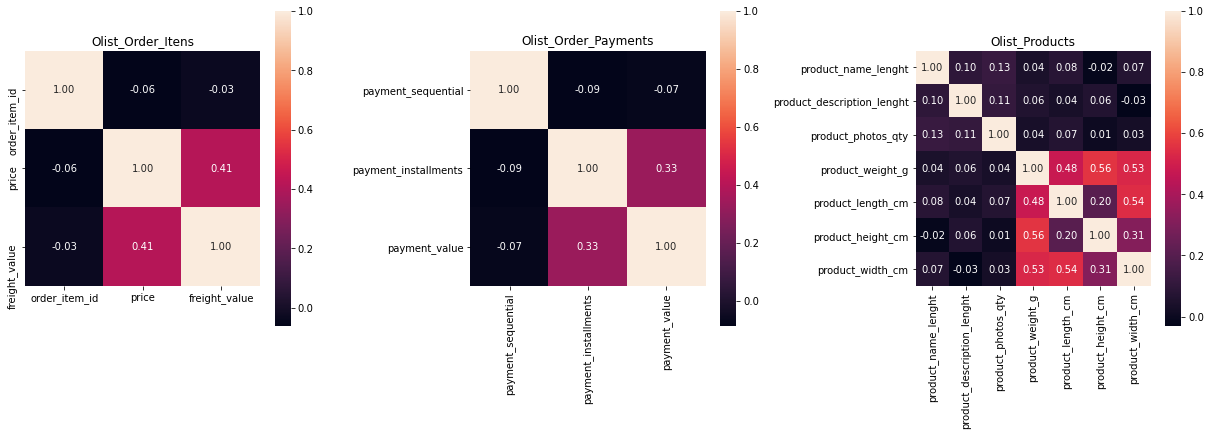

In [295]:
# plotar um heatmap a partir das correlacoes
fig, ax = plt.subplots(figsize=(17,6), nrows=1, ncols=3)
corr_order_itens = df_order_itens.corr()
corr_order_payments = df_order_payments.corr()
corr_products = df_products.corr()
sns.heatmap(corr_order_itens, fmt = ".2f", square = True, annot=True, ax=ax[0])
sns.heatmap(corr_order_payments, fmt = ".2f", square = True, annot=True, ax=ax[1])
sns.heatmap(corr_products, fmt = '.2f', square = True, annot=True, ax=ax[2])
ax[0].set_title('Olist_Order_Itens')
ax[1].set_title('Olist_Order_Payments')
ax[2].set_title('Olist_Products')
plt.tight_layout()

#### Gráfico que mostra a distribuição das variáveis numéricas.

Dados referente aos datasets originais com as variáveis numéricas.

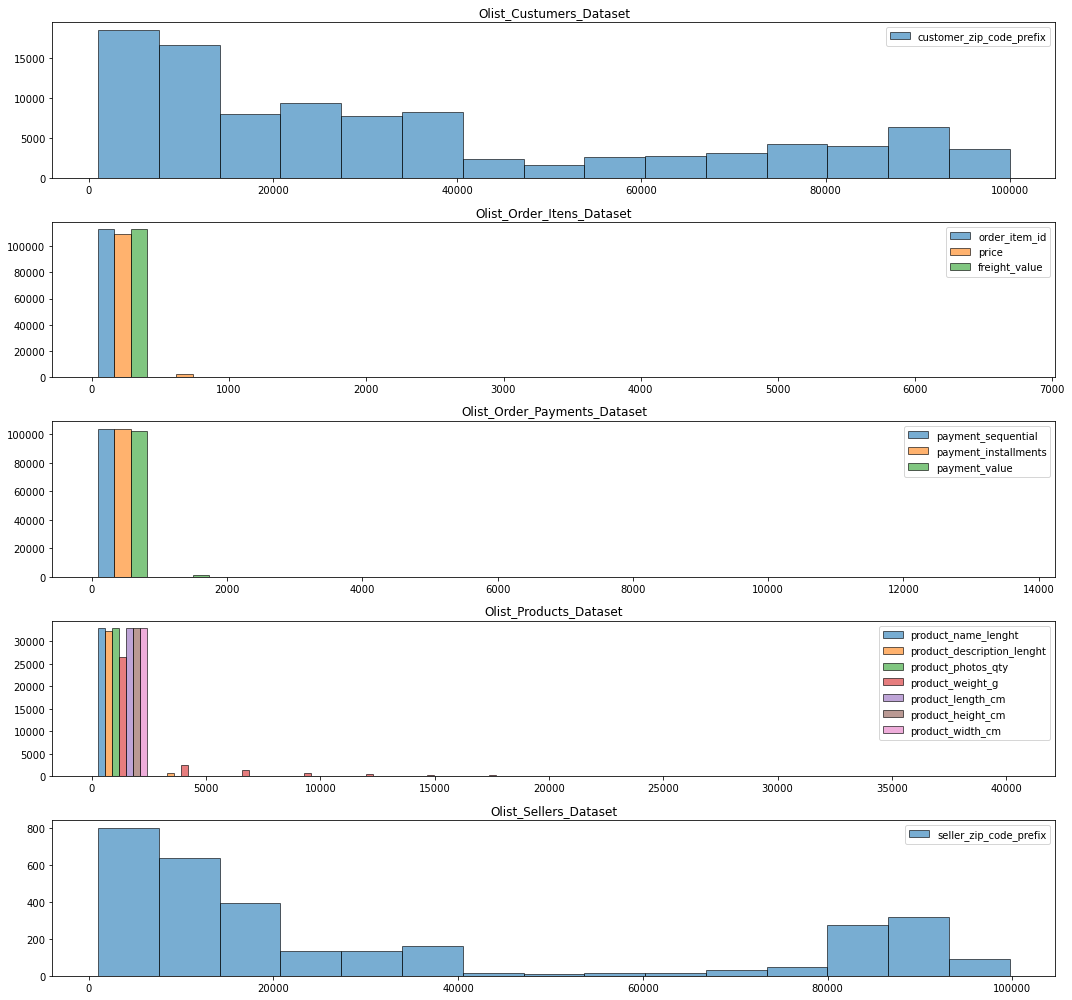

In [296]:
# plotar histograma das variaveis numericas
fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(15,14))
ax[0].hist(df_custumers.customer_zip_code_prefix, bins=15, ec='k', alpha=.6)
ax[1].hist(df_order_itens[['order_item_id', 'price', 'freight_value']], bins=15, ec='k', alpha=.6)
ax[2].hist(df_order_payments[['payment_sequential', 'payment_installments', 'payment_value']], bins=15, ec='k', alpha=.6)
ax[3].hist(df_products[['product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g',
                       'product_length_cm', 'product_height_cm', 'product_width_cm']], bins=15, ec='k', alpha=.6)
ax[4].hist(df_sellers.seller_zip_code_prefix, bins=15, ec='k', alpha=.6)
#
ax[0].set_title('Olist_Custumers_Dataset')
ax[0].legend(['customer_zip_code_prefix'])
ax[1].set_title('Olist_Order_Itens_Dataset')
ax[1].legend(['order_item_id', 'price', 'freight_value'])
ax[2].set_title('Olist_Order_Payments_Dataset')
ax[2].legend(['payment_sequential', 'payment_installments', 'payment_value'])
ax[3].set_title('Olist_Products_Dataset')
ax[3].legend(['product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g',
                       'product_length_cm', 'product_height_cm', 'product_width_cm'])
ax[4].set_title('Olist_Sellers_Dataset')
ax[4].legend(['seller_zip_code_prefix'])
plt.tight_layout()

#### Identificar Outliers

Um outlier é uma observação que se diferencia tanto das demais observações que levanta a suspeita de que aquela observação foi gerada por um mecanismo distinto, ou seja, são observações que estão bem distante de outros registros de dados em uma amostra.

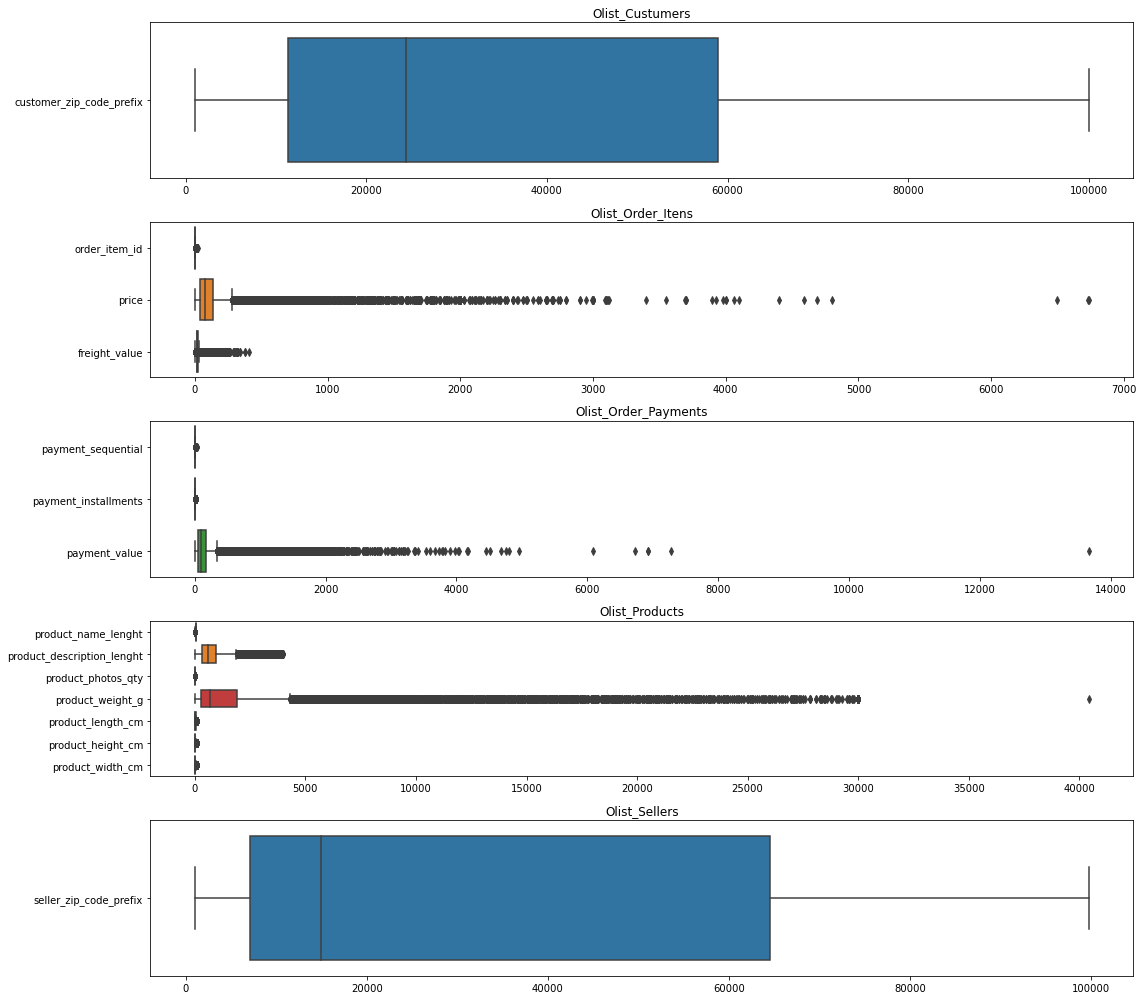

In [7]:
# grafico boxplot
fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(16,14))
sns.boxplot(data=df_custumers, orient='h', ax=ax[0])
sns.boxplot(data=df_order_itens, orient='h', ax=ax[1])
sns.boxplot(data=df_order_payments, orient='h', ax=ax[2])
sns.boxplot(data=df_products, orient='h', ax=ax[3])
sns.boxplot(data=df_sellers, orient='h', ax=ax[4])
ax[0].set_title('Olist_Custumers')
ax[1].set_title('Olist_Order_Itens')
ax[2].set_title('Olist_Order_Payments')
ax[3].set_title('Olist_Products')
ax[4].set_title('Olist_Sellers')

plt.tight_layout()

Para tratar dos outliers desse conjunto de dados, vamos utilizar a regra do IQR Score, a variação interquartil (IQR) pode ser usada para identificar matematicamente os outliers de um conjunto de dados

Em geral, para encontrar o valor base para os outliers de baixo, você pega o valor do primeiro quartil (Q1) e diminui pelo valor do IQR multiplicado por 1,5.

Ou seja, outliers baixos estão abaixo de Q1 − (1,5IQR), já para os outliers de cima, você deve somar o terceiro quartil (Q3) com o produto da mesma multiplicação anterior. Outliers de cima passam de Q3 + (1,5IQR).

Para identificar o Q1 e Q3, pelo comando describe(), Q1 = 25% e Q3 = 75%

------------------------------------------------------------

#### Analise para identificar o motivo dos ***Outliers*** no Dataset Order_itens:

* Como pode ver na analise a baixo, não foi identificado ***outliers***, todas as vendas que estão com valores em discrepância, ou seja, esses valores são de vendas que foram concluído e entregue com sucesso aos clientes, por isso não podemos alterar ou remover os valores, se não temos problemas no resultado final.

In [298]:
# estatisicas do dataset
df_order_itens.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


Foi filtrado os maiores valores contido na variável `price`, onde acusou ***outliers***

In [299]:
# filtrar coluna price do maior valor para o menor
df_order_itens.price.sort_values(ascending=False).head(6)

3556      6735.0
112233    6729.0
107841    6499.0
74336     4799.0
11249     4690.0
62086     4590.0
Name: price, dtype: float64

Foi pego os 4 maiores valores, e filtrado pelo index.

In [300]:
# filtrar pelo index
df_order_itens.loc[[3556,112233,107841,74336],]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
3556,0812eb902a67711a1cb742b3cdaa65ae,1,489ae2aa008f021502940f251d4cce7f,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.0,194.31
112233,fefacc66af859508bf1a7934eab1e97f,1,69c590f7ffc7bf8db97190b6cb6ed62e,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.0,193.21
107841,f5136e38d1a14a4dbd87dff67da82701,1,1bdf5e6731585cf01aa8169c7028d6ad,ee27a8f15b1dded4d213a468ba4eb391,2017-06-15 02:45:17,6499.0,227.66
74336,a96610ab360d42a2e5335a3998b4718a,1,a6492cc69376c469ab6f61d8f44de961,59417c56835dd8e2e72f91f809cd4092,2017-04-18 13:25:18,4799.0,151.34


Filtrando a coluna `order_id`, vemos que o status do pedido, está como `delivered`, ou seja, entregue com sucesso ao clientes.

In [301]:
# filtrar no dataset ordens
valores_ordens_id = ['0812eb902a67711a1cb742b3cdaa65ae','fefacc66af859508bf1a7934eab1e97f','f5136e38d1a14a4dbd87dff67da82701',
                    'a96610ab360d42a2e5335a3998b4718a']
df_orders[df_orders.order_id.isin(valores_ordens_id)]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
3508,f5136e38d1a14a4dbd87dff67da82701,3fd6777bbce08a352fddd04e4a7cc8f6,delivered,2017-05-24 18:14:34,2017-05-26 02:45:17,2017-05-26 11:20:47,2017-06-05 17:09:48,2017-06-28 00:00:00
22171,0812eb902a67711a1cb742b3cdaa65ae,c6e2731c5b391845f6800c97401a43a9,delivered,2017-02-12 20:37:36,2017-02-12 20:45:12,2017-02-16 09:23:13,2017-03-03 14:23:18,2017-03-09 00:00:00
28326,fefacc66af859508bf1a7934eab1e97f,f48d464a0baaea338cb25f816991ab1f,delivered,2018-07-25 18:10:17,2018-07-27 04:05:13,2018-08-03 14:42:00,2018-08-15 14:57:50,2018-08-10 00:00:00
53352,a96610ab360d42a2e5335a3998b4718a,df55c14d1476a9a3467f131269c2477f,delivered,2017-04-01 15:58:40,2017-04-03 13:25:18,2017-04-11 15:10:34,2017-04-17 11:04:45,2017-05-02 00:00:00


Filtro pelo `product_id`, para identificar mais detalhes referente ao produto.

In [302]:
# filtrar no dataset de produtos
valores = ['489ae2aa008f021502940f251d4cce7f','69c590f7ffc7bf8db97190b6cb6ed62e', '1bdf5e6731585cf01aa8169c7028d6ad',
          'a6492cc69376c469ab6f61d8f44de961']
df_products[df_products.product_id.isin(valores)]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
5899,489ae2aa008f021502940f251d4cce7f,utilidades_domesticas,31.0,875.0,2.0,30000.0,60.0,61.0,33.0
14423,1bdf5e6731585cf01aa8169c7028d6ad,artes,28.0,3954.0,2.0,7400.0,47.0,25.0,25.0
21197,a6492cc69376c469ab6f61d8f44de961,eletroportateis,41.0,1780.0,2.0,22600.0,55.0,40.0,40.0
21768,69c590f7ffc7bf8db97190b6cb6ed62e,pcs,50.0,1935.0,4.0,5660.0,54.0,18.0,47.0


Analise da variável `freight_value`, também foi identificado que o maior valor, pedido entregue com sucesso ao cliente.

In [304]:
# filtrando o maior valor
df_order_itens.freight_value.sort_values(ascending=False).head(1)

73486    409.68
Name: freight_value, dtype: float64

In [305]:
# filtrando pelo index
df_order_itens.loc[73486]

order_id               a77e1550db865202c56b19ddc6dc4d53
order_item_id                                         1
product_id             ec31d2a17b299511e7c8627be9337b9b
seller_id              257e61d3251fb5efb9daadddbc2cf7ca
shipping_limit_date                 2018-04-25 06:55:13
price                                             979.0
freight_value                                    409.68
Name: 73486, dtype: object

In [306]:
# pegando o product_id do dataset de produtos
df_products[df_products.product_id == 'ec31d2a17b299511e7c8627be9337b9b']

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
4142,ec31d2a17b299511e7c8627be9337b9b,bebes,44.0,385.0,6.0,14675.0,55.0,64.0,52.0


In [307]:
# pegando o order_id do dataset de orders
df_orders[df_orders.order_id == 'a77e1550db865202c56b19ddc6dc4d53']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
50468,a77e1550db865202c56b19ddc6dc4d53,4eed76c1aafeceac4250e202ca9b1a5a,delivered,2018-04-16 14:57:21,2018-04-19 06:55:13,2018-04-19 18:32:29,2018-04-27 19:45:00,2018-05-17 00:00:00


Feita algumas analise nos dados, iremos utilizar a técnica de IQR Score para limpeza dos `Outliers`.

In [8]:
# identificar ouliers para a variavel price
q1_order_itens_price = df_order_itens.price.quantile(.25)
q3_order_itens_price = df_order_itens.price.quantile(.75)
iqr_order_itens_price = q3_order_itens_price - q1_order_itens_price
print('IQR da variavel price: ',iqr_order_itens_price)

# definindo limite
sup_order_itens_price = q3_order_itens_price + 1.5 * iqr_order_itens_price
inf_order_itens_price = q1_order_itens_price - 1.5 * iqr_order_itens_price
print('Limite superior: ',sup_order_itens_price)
print('Limite inferior: ',inf_order_itens_price)

###
q1_order_itens_freight_value = df_order_itens.freight_value.quantile(.25)
q3_order_itens_freight_value = df_order_itens.freight_value.quantile(.75)
iqr_order_itens_freight_value = q3_order_itens_freight_value - q1_order_itens_freight_value
print('IQR da variavel freight_value: ',iqr_order_itens_freight_value)

# definindo limite
sup_order_itens_freight_value = q3_order_itens_freight_value + 1.5 * iqr_order_itens_freight_value
inf_order_itens_freight_value = q1_order_itens_freight_value - 1.5 * iqr_order_itens_freight_value
print('Limite superior: ',sup_order_itens_freight_value)
print('Limite inferior: ',inf_order_itens_freight_value)

IQR da variavel price:  95.0
Limite superior:  277.4
Limite inferior:  -102.6
IQR da variavel freight_value:  8.069999999999999
Limite superior:  33.254999999999995
Limite inferior:  0.9750000000000032


In [9]:
# limpando o dataset
print('Shape antes da limpeza: \t',df_order_itens.shape)
df_order_itens.drop(df_order_itens[df_order_itens.price > 277.4].index, axis=0, inplace=True)
##
# limpando o dataset
df_order_itens.drop(df_order_itens[df_order_itens.freight_value > 33.25].index, axis=0, inplace=True)
print('Shape depois da limpeza: \t',df_order_itens.shape)

Shape antes da limpeza: 	 (112650, 7)
Shape depois da limpeza: 	 (95605, 7)


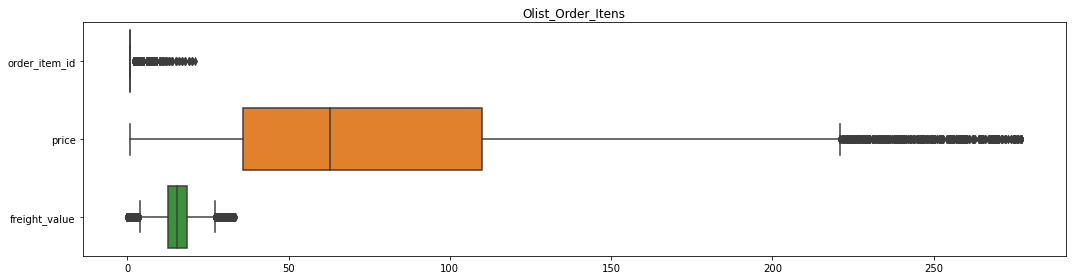

In [10]:
# boxplot dataset order_payments
fig, ax = plt.subplots(figsize=(15,4))
sns.boxplot(data=df_order_itens, orient='h', ax=ax)
ax.set_title('Olist_Order_Itens')
plt.tight_layout()

#### Analise para identificar o motivo dos ***Outliers*** no Dataset Order_payments:

* Conforme analise da variável `payment_value`, percebe um valor bem maior que os demais, de 13664.08, consultado no dataset de `orders`, visto que o produtos foi entregue ao cliente, fica identificado como um `Outlier`.

In [311]:
# estatistica do dataset order_payments
df_order_payments.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [312]:
# filtrar variavel payments_value pelo maior valor
df_order_payments.payment_value.sort_values(ascending=False).head(5)

52107    13664.08
34370     7274.88
41419     6929.31
49581     6922.21
85539     6726.66
Name: payment_value, dtype: float64

In [321]:
# filtrar pelo index
df_order_payments.loc[[52107,34370,49581],]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
52107,03caa2c082116e1d31e67e9ae3700499,1,credit_card,1,13664.08
34370,736e1922ae60d0d6a89247b851902527,1,boleto,1,7274.88
49581,fefacc66af859508bf1a7934eab1e97f,1,boleto,1,6922.21


In [322]:
# pegando o order_id dataset orders
valores_order_payments = ['03caa2c082116e1d31e67e9ae3700499', '736e1922ae60d0d6a89247b851902527', 'fefacc66af859508bf1a7934eab1e97f']
df_orders[df_orders.order_id.isin(valores_order_payments)]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
13390,03caa2c082116e1d31e67e9ae3700499,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23 00:00:00
28326,fefacc66af859508bf1a7934eab1e97f,f48d464a0baaea338cb25f816991ab1f,delivered,2018-07-25 18:10:17,2018-07-27 04:05:13,2018-08-03 14:42:00,2018-08-15 14:57:50,2018-08-10 00:00:00
66599,736e1922ae60d0d6a89247b851902527,ec5b2ba62e574342386871631fafd3fc,delivered,2018-07-15 14:49:44,2018-07-17 04:31:36,2018-07-20 13:09:00,2018-07-26 22:03:06,2018-08-02 00:00:00


Usando a mesma técnica de IQR Score usada no dataset Order_itens.

In [11]:
# identificar ouliers para a variavel price
q1_order_payments_payment_value = df_order_payments.payment_value.quantile(.25)
q3_order_payments_payment_value = df_order_payments.payment_value.quantile(.75)
iqr_order_payments_payment_value = q3_order_payments_payment_value - q1_order_payments_payment_value
print('IQR da variavel price: ',iqr_order_payments_payment_value)

# definindo limite
sup_order_payments_payment_value = q3_order_payments_payment_value + 1.5 * iqr_order_payments_payment_value
inf_order_payments_payment_value = q1_order_payments_payment_value - 1.5 * iqr_order_payments_payment_value
print('Limite superior: ',sup_order_payments_payment_value)
print('Limite inferior: ',inf_order_payments_payment_value)

IQR da variavel price:  115.04750000000001
Limite superior:  344.40875000000005
Limite inferior:  -115.78125000000003


In [12]:
# limpando o dataset
print('Shape antes da limpeza: \t',df_order_payments.shape)
df_order_payments.drop(df_order_payments[df_order_payments.payment_value > 344.40].index, axis=0, inplace=True)
print('Shape depois da limpeza: \t',df_order_payments.shape)

Shape antes da limpeza: 	 (103886, 5)
Shape depois da limpeza: 	 (95905, 5)


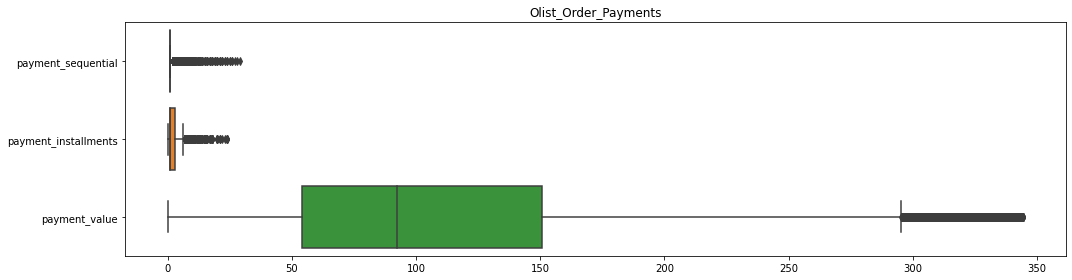

In [13]:
# boxplot dataset order_payments
fig, ax = plt.subplots(figsize=(15,4))
sns.boxplot(data=df_order_payments, orient='h', ax=ax)
ax.set_title('Olist_Order_Payments')
plt.tight_layout()

#### Analise para identificar o motivo dos ***Outliers*** no Dataset Products:

* Analise na variável `product_weight_g` e `product_description_lenght` , que se refere ao peso do produto, existe uma discrepância, mas como são pesos e dimensões dos produtos, não deve alterar o resultado, mas será tratado. 

In [332]:
# analise estatisticas
df_products.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000
mean,48.523656,768.227945,2.148463,2276.376802,30.814725,16.937422,23.196534
std,10.156155,629.658469,1.745732,4281.926387,16.914005,13.637175,12.078707
min,5.000000,4.000000,0.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,344.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,961.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [333]:
# filtrar pelo maior valor coluna product_weight_g (peso do produto)
df_products.product_weight_g.sort_values(ascending=False).head(6)

25166    40425.0
2417     30000.0
4814     30000.0
15982    30000.0
23581    30000.0
7234     30000.0
Name: product_weight_g, dtype: float64

In [334]:
# contar a quantidade de valores == 30000.0
(df_products.product_weight_g == 30000.0).value_counts()

False    32808
True       143
Name: product_weight_g, dtype: int64

In [335]:
# filtrar pelo index
df_products.loc[25166]

product_id                    26644690fde745fc4654719c3904e1db
product_category_name                          cama_mesa_banho
product_name_lenght                                       59.0
product_description_lenght                               534.0
product_photos_qty                                         1.0
product_weight_g                                       40425.0
product_length_cm                                         13.0
product_height_cm                                         65.0
product_width_cm                                          28.0
Name: 25166, dtype: object

In [336]:
# filtrar pelo maior valor na coluna product_description_lenght (numero de caracter referente a descricao do produto)
df_products.product_description_lenght.sort_values(ascending=False).head()

31404    3992.0
21994    3988.0
6104     3985.0
10341    3976.0
9584     3963.0
Name: product_description_lenght, dtype: float64

In [337]:
# filtrar pelo index
df_products.loc[31404]

product_id                    47d52bb24ef8a3aa09724f00604be3ba
product_category_name                             dvds_blu_ray
product_name_lenght                                       30.0
product_description_lenght                              3992.0
product_photos_qty                                         1.0
product_weight_g                                        2600.0
product_length_cm                                         41.0
product_height_cm                                         11.0
product_width_cm                                          32.0
Name: 31404, dtype: object

* Nesse dataset vamos utilizar para variável `product_weight_g` (que seria o peso do produto), calcular a mediana da variável, e substituir os valores maiores.
* Para a variável `product_description_lenght` (número de caracteres extraídos da descrição), vai ser calculado a média, e substituir os valores maiores.

Como são variáveis que não vem a comprometer o resultado final do projeto, optamos para ser feito dessa forma.

In [14]:
# limpeza dos dados
product_weight_g_mediana = df_products['product_weight_g'].median()
product_description_lenght_mean = df_products['product_description_lenght'].mean()
#
print('Shape antes da limpeza: \t',df_products.shape)
df_products.loc[df_products.product_weight_g > 700.0, 'product_weight_g'] = product_weight_g_mediana
df_products.loc[df_products.product_description_lenght > 773.4, 'product_description_lenght'] = product_description_lenght_mean
print('Shape depois da limpeza: \t',df_products.shape)

Shape antes da limpeza: 	 (32951, 9)
Shape depois da limpeza: 	 (32951, 9)


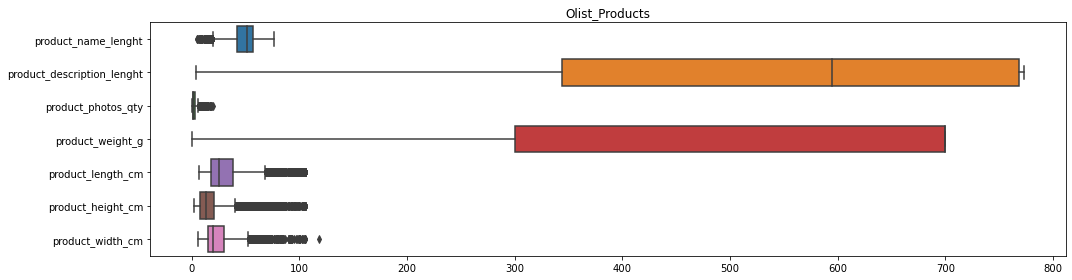

In [15]:
# boxplot dataset products
fig, ax = plt.subplots(figsize=(15,4))
sns.boxplot(data=df_products, orient='h', ax=ax)
ax.set_title('Olist_Products')
plt.tight_layout()

### Criar novo Dataset

Após analise e limpeza dos 9 datasets, será criado unificado os dados, criando um novo dataset usando o comando `merge()`, unindo com base nas variáveis chave de cada dataset, e filtrando somente as colunas necessárias para continuação do projeto.

In [38]:
df_olist_dataset_01 = pd.merge(df_orders[['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 
                                          'order_delivered_customer_date']], 
                               df_order_itens[['order_id', 'order_item_id', 'product_id', 'seller_id','price', 'freight_value']], 
                               on='order_id')

In [39]:
df_olist_dataset_02 = pd.merge(df_olist_dataset_01, df_order_payments[['order_id', 'payment_type','payment_installments', 
                                                                       'payment_value']], on='order_id')

In [40]:
df_olist_dataset_03 = pd.merge(df_olist_dataset_02, df_custumers, on='customer_id')

In [41]:
df_olist_dataset_04 = pd.merge(df_olist_dataset_03, df_products[['product_id','product_category_name']], on='product_id')

In [42]:
df_olist_dataset_05 = pd.merge(df_olist_dataset_04, df_sellers, on='seller_id')

In [43]:
# novo dataset criado usando o merge
print('Dimenssões do Dataset: \n',
     'Número de variáveis: ',df_olist_dataset_05.shape[1], '\n',
     'Número de linha: ',df_olist_dataset_05.shape[0])

# primeiras linhas do novo dataset
df_olist_dataset_05.head()

Dimenssões do Dataset: 
 Número de variáveis:  21 
 Número de linha:  96282


,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_item_id,product_id,seller_id,price,freight_value,...,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,...,1,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,utilidades_domesticas,9350,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,...,1,2.00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,utilidades_domesticas,9350,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,...,1,18.59,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,utilidades_domesticas,9350,maua,SP
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-18 14:44:43,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,7.78,...,3,37.77,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,utilidades_domesticas,9350,maua,SP
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-07 18:30:01,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,7.78,...,1,37.77,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,utilidades_domesticas,9350,maua,SP


In [44]:
# verificar valores nulos
df_olist_dataset_05.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_delivered_customer_date    0
order_item_id                    0
product_id                       0
seller_id                        0
price                            0
freight_value                    0
payment_type                     0
payment_installments             0
payment_value                    0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
product_category_name            0
seller_zip_code_prefix           0
seller_city                      0
seller_state                     0
dtype: int64

In [45]:
# informacoes do dataset
df_olist_dataset_05.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96282 entries, 0 to 96281
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       96282 non-null  object 
 1   customer_id                    96282 non-null  object 
 2   order_status                   96282 non-null  object 
 3   order_purchase_timestamp       96282 non-null  object 
 4   order_delivered_customer_date  96282 non-null  object 
 5   order_item_id                  96282 non-null  int64  
 6   product_id                     96282 non-null  object 
 7   seller_id                      96282 non-null  object 
 8   price                          96282 non-null  float64
 9   freight_value                  96282 non-null  float64
 10  payment_type                   96282 non-null  object 
 11  payment_installments           96282 non-null  int64  
 12  payment_value                  96282 non-null 

#### Converter as variaǘeis Data

Será convertido as variáveis no formato de data, para o tipo de dados data, para facilitar a analise e criação de `insights`.

In [47]:
# conveter colunas data para formato datetime
df_olist_dataset_05['order_purchase_timestamp'] = pd.to_datetime(df_olist_dataset_05['order_purchase_timestamp'])
df_olist_dataset_05['order_delivered_customer_date'] = pd.to_datetime(df_olist_dataset_05['order_delivered_customer_date'])

In [53]:
# verificar variaveis apos conveter
df_olist_dataset_05[['order_purchase_timestamp','order_delivered_customer_date']].dtypes

order_purchase_timestamp         datetime64[ns]
order_delivered_customer_date    datetime64[ns]
dtype: object

In [160]:
# salvando novo dataset
df_olist_dataset_05.to_csv('df_olist_dataset.csv')

### Criando analises para gerar insights

delivered      94320
shipped          985
canceled         427
invoiced         283
processing       259
unavailable        5
approved           3
Name: order_status, dtype: int64


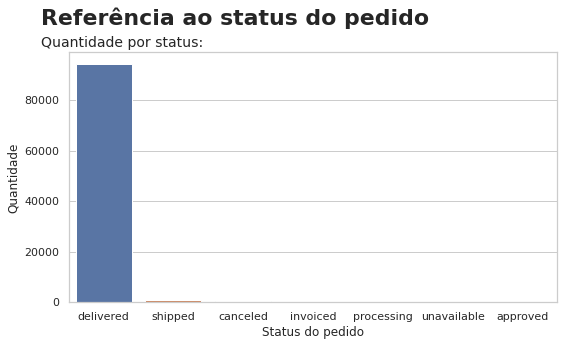

In [111]:
# contagem de valores
sns.set_theme(style="whitegrid",font='sans-serif')
fig, ax = plt.subplots(figsize=(8,5))
print(pd.Series(df_olist_dataset_05.order_status).value_counts())
sns.countplot(df_olist_dataset_05.order_status)
# titulo
ax.text(-0.9,110000, 'Referência ao status do pedido', fontsize=22, fontweight='bold')
ax.text(-0.9,101000, 'Quantidade por status:', fontsize=14)
ax.set_xlabel('Status do pedido')
ax.set_ylabel('Quantidade')
plt.tight_layout()

credit_card    70481
boleto         18944
voucher         5399
debit_card      1458
Name: payment_type, dtype: int64


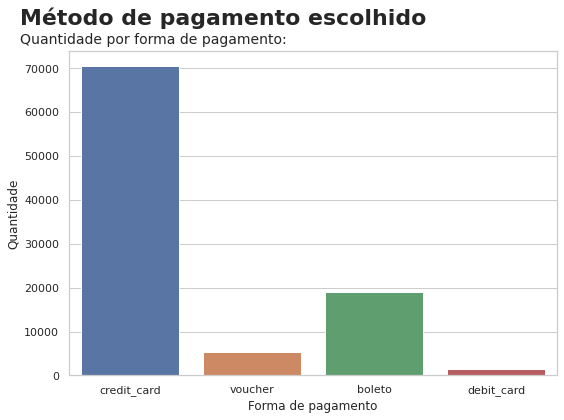

In [158]:
# contagem de valores
sns.set_theme(style="whitegrid",font='sans-serif')
fig, ax = plt.subplots(figsize=(8,6))
print(pd.Series(df_olist_dataset_05.payment_type).value_counts())
sns.countplot(df_olist_dataset_05.payment_type)
# titulo
ax.text(-0.9,79999, 'Método de pagamento escolhido', fontsize=22, fontweight='bold')
ax.text(-0.9,75599, 'Quantidade por forma de pagamento:', fontsize=14)
ax.set_xlabel('Forma de pagamento')
ax.set_ylabel('Quantidade')
plt.tight_layout()

In [225]:
(df_olist_dataset_05.product_category_name).value_counts()[:10]

cama_mesa_banho           10542
beleza_saude               8180
esporte_lazer              7669
moveis_decoracao           7192
informatica_acessorios     6440
utilidades_domesticas      6185
relogios_presentes         4806
telefonia                  4204
brinquedos                 3651
automotivo                 3445
Name: product_category_name, dtype: int64


cama_mesa_banho           10542
beleza_saude               8180
esporte_lazer              7669
moveis_decoracao           7192
informatica_acessorios     6440
utilidades_domesticas      6185
relogios_presentes         4806
telefonia                  4204
brinquedos                 3651
automotivo                 3445
Name: product_category_name, dtype: int64


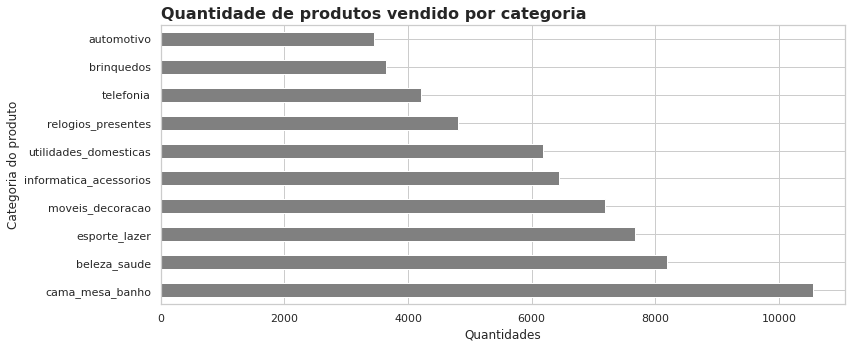

In [237]:
# plot 
fig, ax = plt.subplots(figsize=(12,5))
print((df_olist_dataset_05.product_category_name).value_counts()[:10])
(df_olist_dataset_05.product_category_name).value_counts()[:10].plot(kind='barh',color='gray')
ax.set_title('Quantidade de produtos vendido por categoria', fontweight = 'bold', fontsize=16, loc='left')
ax.set_xlabel('Quantidades')
ax.set_ylabel('Categoria do produto')
plt.tight_layout()

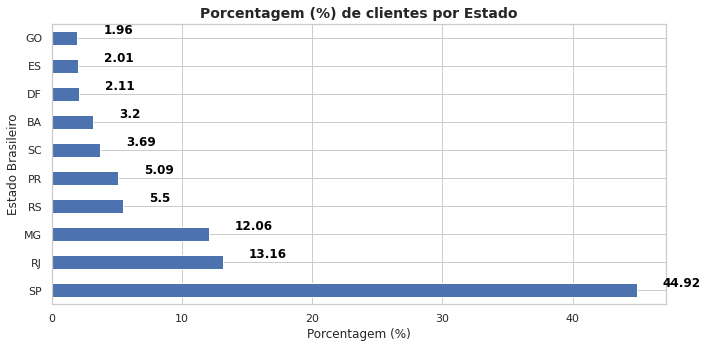

In [213]:
# grafico de barras porcentagem de clientes por estado
fig, ax = plt.subplots(figsize=(10,5))
(df_olist_dataset_05.customer_state.value_counts() / df_olist_dataset_05.shape[0] * 100).round(2)[:10].plot(kind='barh')
for i, v in enumerate((df_olist_dataset_05.customer_state.value_counts() / df_olist_dataset_05.shape[0] * 100).round(2)[:10]): 
    ax.text(v + 2, i + .15, str(v),  
            color = 'black', fontweight = 'bold')
ax.set_title('Porcentagem (%) de clientes por Estado', fontsize=14, fontweight='bold')
ax.set_xlabel('Porcentagem (%)')
ax.set_ylabel('Estado Brasileiro')
plt.tight_layout()

#### Comprando o total pago, com o valor do iten, distribuído por formas de pagamentos:

* Podemos analise nesse gráfico, que quanto maior o valor do item, a forma de pagamento é o `voucher`.
* Quanto mais caro é o valor da transação, a forma de pagamento é o cartão de crédito.

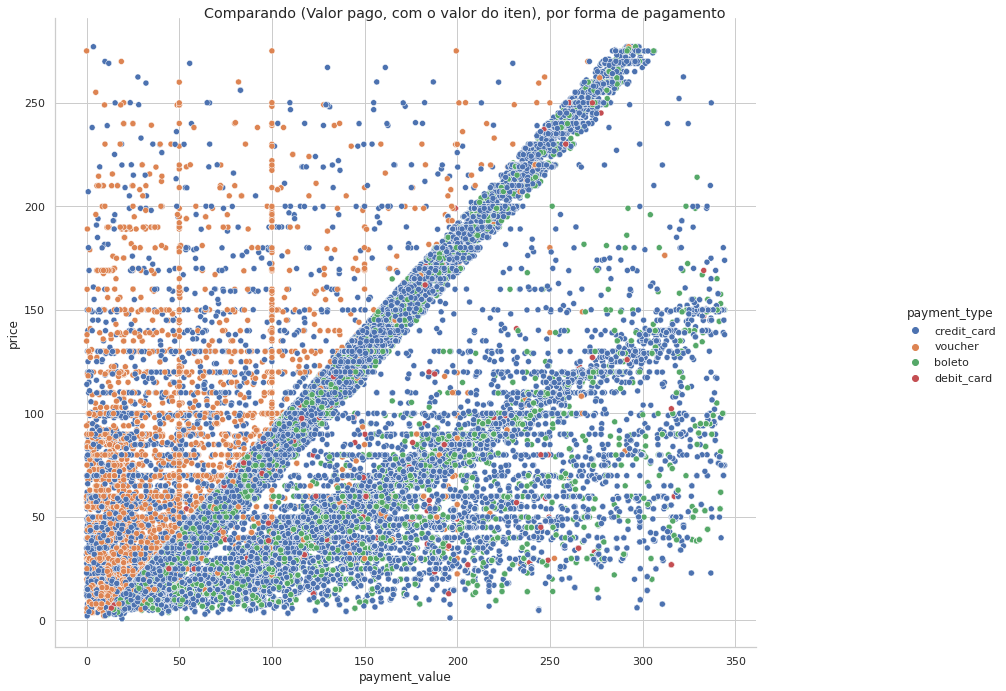

In [253]:
#sns.relplot(x='customer_id', y='product_id', hue='payment_type', data=df_olist_dataset_05)
g = sns.relplot(x='payment_value', y='price', hue='payment_type', data=df_olist_dataset_05)
g.fig.suptitle('Comparando (Valor pago, com o valor do iten), por forma de pagamento')
g.fig.set_size_inches(15,10)

In [115]:
df_olist_dataset_05.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_item_id,product_id,seller_id,price,freight_value,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,credit_card,1,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,utilidades_domesticas,9350,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,voucher,1,2.00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,utilidades_domesticas,9350,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,voucher,1,18.59,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,utilidades_domesticas,9350,maua,SP
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-18 14:44:43,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,7.78,credit_card,3,37.77,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,utilidades_domesticas,9350,maua,SP
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-07 18:30:01,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,7.78,credit_card,1,37.77,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,utilidades_domesticas,9350,maua,SP
